In [37]:
import pandas as pd
import numpy as np
import pydotplus
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv ("SurveyLungCancer.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC_DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL_CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS_OF_BREATH    309 non-null    int64 
 13  SWALLOWING_DIFFICULTY  309 non-null    int64 
 14  CHEST_PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [6]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'NO': 0, 'YES': 1})
df['GENDER'] = df['GENDER'].map({'M': 0, 'F': 1})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC_DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL_CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS_OF_BREATH    309 non-null    int64
 13  SWALLOWING_DIFFICULTY  309 non-null    int64
 14  CHEST_PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

Creating Model for Logistic Regression

In [8]:
y = df.LUNG_CANCER.values #target
x = df.drop(['LUNG_CANCER'], axis = 1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

In [10]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train,y_train)

acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 89.25%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Creating model for Decision tree algorithm

In [11]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 90.32%


Random Forest Classification

In [12]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 19, random_state = 1)
rf.fit(x_train, y_train)

acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 86.02%


KNeighborsClassification

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(x_train, y_train)

acc = knn.score(x_test,y_test)*100
accuracies['KNN'] = acc

print('Accuracy of K-NN classifier on test set: {:.2f}'.format(acc))

Accuracy of K-NN classifier on test set: 83.87


<ipython-input-14-d5702b4a2600>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)


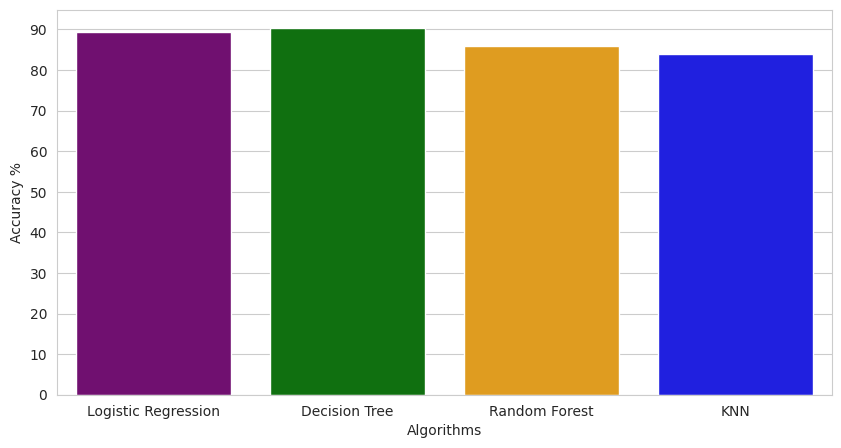

In [14]:
colors = ["purple", "green", "orange", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()   #Key is the name of the Algorithm (X-axis) #Values is the accuracies (Y-axis)

Computing confusion matrix for all the algorithms

In [16]:
# Predicted values
y_head_lr = lr.predict(x_test) #x-test is to test inputs
y_head_dtc = dtc.predict(x_test)
y_head_rf = rf.predict(x_test)
y_head_knn = knn.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr) #y-test is the raw data, y-head is the predicted value
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)
cm_knn = confusion_matrix(y_test,y_head_knn)

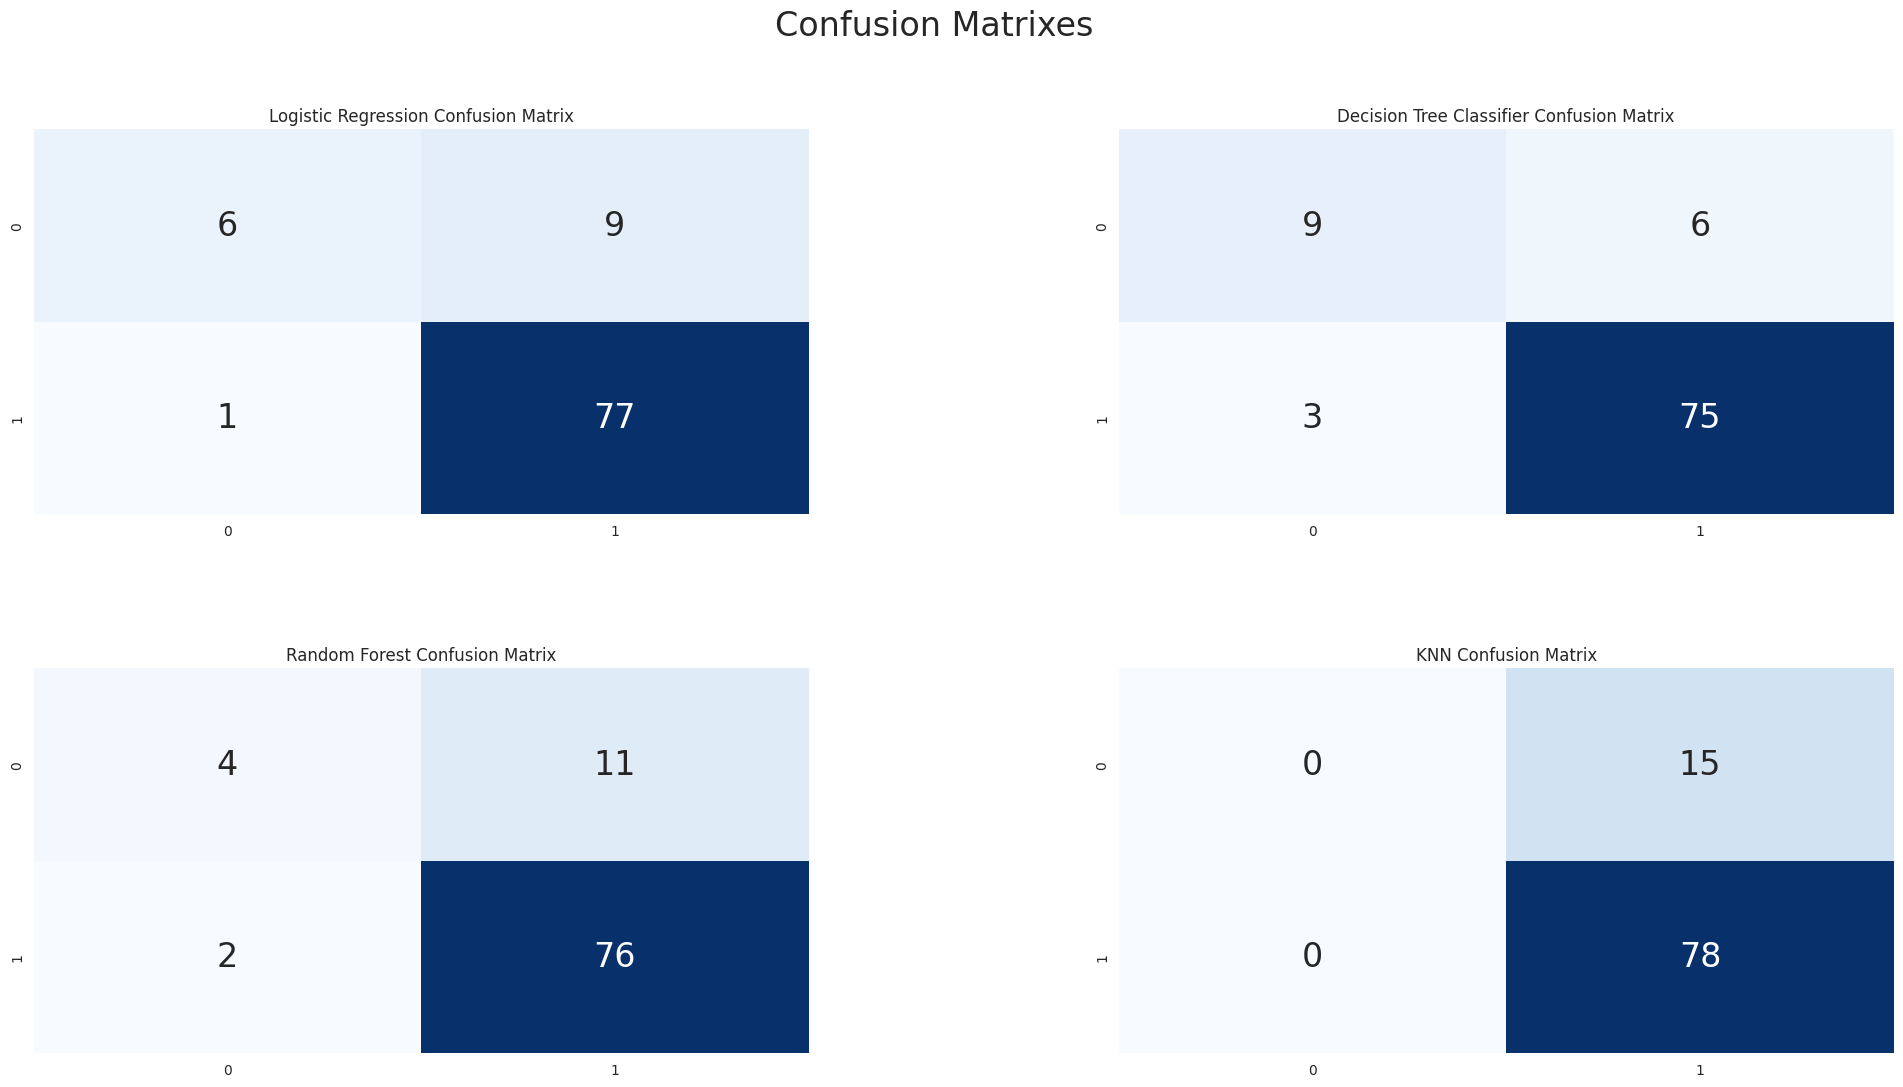

In [18]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,2)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,3)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,4)
plt.title("KNN Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

Logistic: ROC AUC=0.933


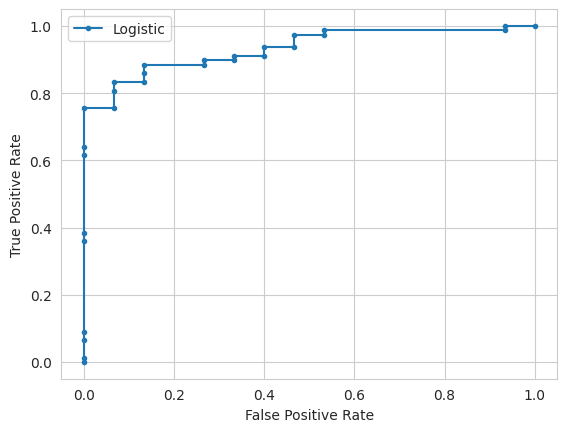

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# predict probabilities
lr_probs = lr.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))


# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Decision Tree

Import Modules

In [20]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [21]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [22]:
df.LUNG_CANCER.unique()

array([1, 0])

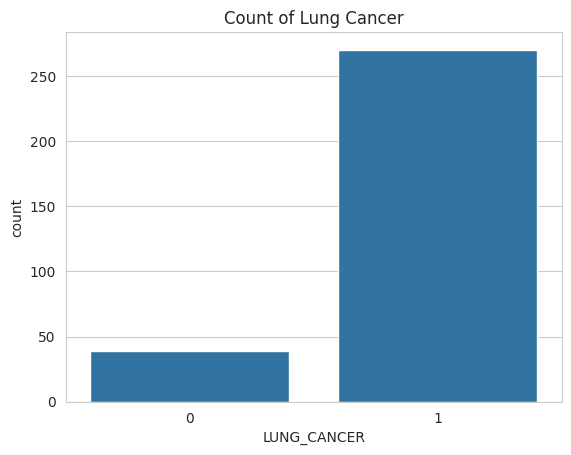

In [23]:
import seaborn as sns
sns.countplot(data=df, x='LUNG_CANCER')
plt.title('Count of Lung Cancer')
plt.show()

In [24]:
print(df.groupby('LUNG_CANCER').size())

LUNG_CANCER
0     39
1    270
dtype: int64


2. Split the dataset into testing and training sets

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,df.columns != 'LUNG_CANCER'], df['LUNG_CANCER'],
stratify=df['LUNG_CANCER'], random_state=66)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC_DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL_CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS_OF_BREATH    309 non-null    int64
 13  SWALLOWING_DIFFICULTY  309 non-null    int64
 14  CHEST_PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

3. Split the features and target variables

In [27]:
features = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE','ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']

X = df[features] #input
y = df['LUNG_CANCER'] #target

print(X)
print(y)

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         0   69        1               2        2              1   
1         0   74        2               1        1              1   
2         1   59        1               1        1              2   
3         0   63        2               2        2              1   
4         1   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       1   56        1               1        1              2   
305       0   70        2               1        1              1   
306       0   58        2               1        1              1   
307       0   67        2               1        2              1   
308       0   62        1               1        1              2   

     CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  COUGHING  \
0                  1        2        1         2                  2         2   
1        

4. Model Evaluation using Decision Tree Model

In [28]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.936


The accuracy of training set is 100% and testing set is 71.40%.
This indicates overfitting, therefore we need to apply pre-prunning to the tree. We will add a max_depth= 3 (limiting the depth/ branching of tree).

In [29]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.949


5. Features Importance in Decision Tree

In [30]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[0.         0.15761964 0.         0.1121205  0.08504004 0.
 0.05648765 0.08156549 0.13841274 0.06532919 0.02804067 0.07761604
 0.         0.19776803 0.        ]


The above Value is affected by the max_depth

6. Visualization of Feature Importance

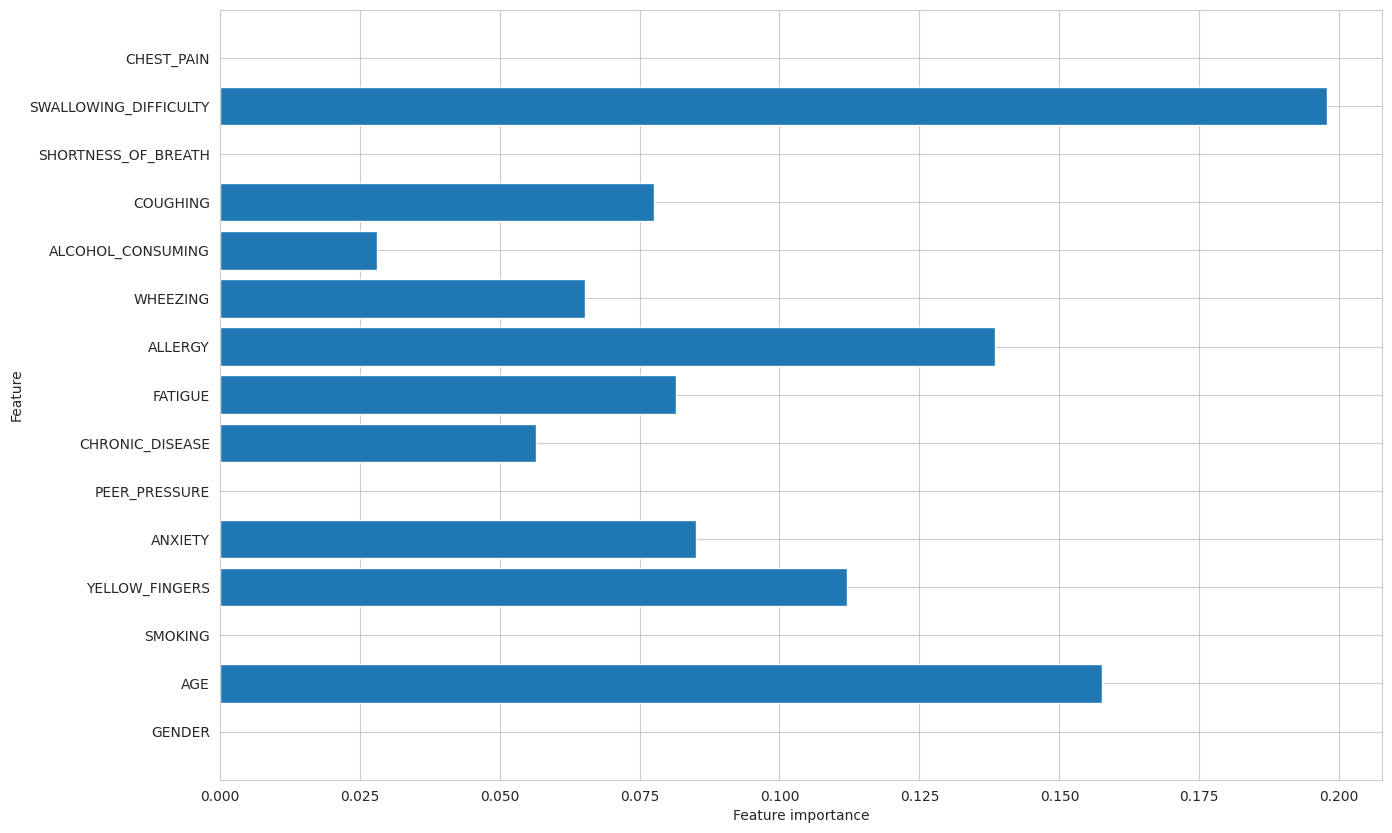

In [34]:
def plot_feature_importances_LUNG_CANCER(model):
    plt.figure(figsize=(15,10))
    n_features = 15  #total number of input features
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features) #yticks is for column name
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_LUNG_CANCER(tree)

In [35]:
important_features = ['SWALLOWING_DIFFICULTY', 'COUGHING', 'ALCOHOL_CONSUMING', 'WHEEZING', 'ALLERGY', 'FATIGUE', 'CHRONIC_DISEASE', 'ANXIETY', 'YELLOW_FINGERS', 'AGE']
#Take only the varible with figures
f = df[important_features] #input
t = df['LUNG_CANCER'] #target

print(f)
print(t)

     SWALLOWING_DIFFICULTY  COUGHING  ALCOHOL_CONSUMING  WHEEZING  ALLERGY  \
0                        2         2                  2         2        1   
1                        2         1                  1         1        2   
2                        1         2                  1         2        1   
3                        2         1                  2         1        1   
4                        1         2                  1         2        1   
..                     ...       ...                ...       ...      ...   
304                      2         2                  2         1        1   
305                      1         2                  2         2        2   
306                      1         2                  2         2        2   
307                      1         2                  2         1        2   
308                      2         1                  2         2        2   

     FATIGUE  CHRONIC_DISEASE  ANXIETY  YELLOW_FINGERS  AGE  
0

7. Create decision tree using important features

In [41]:
# Create and fit the decision tree
clf_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf_dt.fit(f, t)

# Export resulting tree to DOT source code string
dot_data = export_graphviz(clf_dt,
                                feature_names=important_features,
                                out_file=None,
                                filled=True, #Colour
                                rounded=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('tree2.png')

True

In [39]:
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz

tree_rules = export_text(clf_dt, feature_names=important_features)
print(tree_rules)

|--- ALLERGY <= 1.50
|   |--- SWALLOWING_DIFFICULTY <= 1.50
|   |   |--- COUGHING <= 1.50
|   |   |   |--- class: 0
|   |   |--- COUGHING >  1.50
|   |   |   |--- class: 1
|   |--- SWALLOWING_DIFFICULTY >  1.50
|   |   |--- FATIGUE <= 1.50
|   |   |   |--- class: 1
|   |   |--- FATIGUE >  1.50
|   |   |   |--- class: 1
|--- ALLERGY >  1.50
|   |--- AGE <= 29.50
|   |   |--- class: 0
|   |--- AGE >  29.50
|   |   |--- YELLOW_FINGERS <= 1.50
|   |   |   |--- class: 1
|   |   |--- YELLOW_FINGERS >  1.50
|   |   |   |--- class: 1

